>### This code loops through all exposures and counts the stars in a g-i vs. g-DDO51 color-color plot.  (Note that xedge and yedge are predefined from previously determined bin sizes).  The resulting data are then plotted as a 2D histogram.

In [ ]:
import os

#Building a list of all exposures subdivided by CCDs
path, dirsyear, files = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51"))

night = []
ccdn = []

#Counting number of files in a directory and a list of all hd5 file names.  
#This will be used to create a blank array for mean offsets.
for i in dirsyear:
    path, dirsnight, files = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\{0}".format(i)))
    for j in dirsnight:
        path, dirs, filesnight = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\{0}\{1}\pcat".format(i,j)))
        night += filesnight

#Split nights array
nights = [s[0:14] for s in night]

In [4]:
# Import modules
from astropy.table import Table
from astropy.io import fits
import numpy as np
from scipy import stats
import basic

xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\xedgegigd200b.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\yedgegigd200b.npy')
retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\retarray.npy')

for i, v in enumerate(nights):
    #Loading data from each night
    z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(v[1:3],v[0:7],v[0:14]))

    #Load data using basic.py
    path = r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(v[1:3],v[0:7],v[0:14])
    t = basic.Catalog.read(path)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')

    #Remove nans
    ind = np.where((~np.isnan(z['g']))&(~np.isnan(z['i']))&(~np.isnan(z['ddo51'])))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    ddo51 = z['ddo51'][ind]

    #Numpy arrays with photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    d = np.array(ddo51)

    #Colors: g-d = y and g-i = x
    y = g - d
    x = g - i

    ret,xed,yed,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])
    
    retm = np.add(ret,retm)

C:\Users\Sammy\Anaconda3\lib\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


<IPython.core.display.Javascript object>


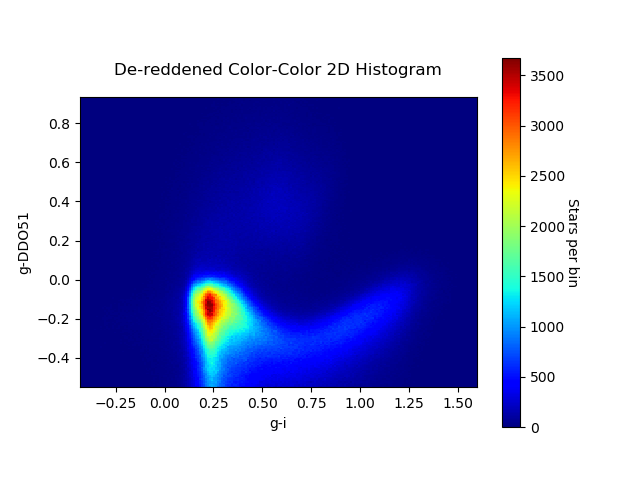

In [5]:
#Plot the final result
import matplotlib.pyplot as plt
%matplotlib nbagg

ax = plt.imshow(retm.T,extent=[xedge.min()/2,xedge.max()/2,yedge.min(),yedge.max()],origin='lower',cmap='jet')
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
plt.title('De-reddened Color-Color 2D Histogram', y=1.05)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)

plt.show()

In [6]:
#Saving counts
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\retarray.npy',retm)